In [1]:
import torch
import pandas as pd
import seaborn as sns

Choose data:

In [2]:
base_path = '/home/fpetruzzellis/Progetti/seq-mnist/models/checkpoints/'

In [56]:
smnist = {
    "18-05-22": base_path + "dntm_trained_smnist_18-05-22.pth",
    "09-07-22": base_path + "dntm_trained_smnist_09-07-2022.pth",
}

In [96]:
pmnist = {
    "02-06-22": base_path + "dntm_trained_pmnist_02-06-22.pth",
    "09-07-22": base_path + "dntm_trained_pmnist_09-07-2022.pth",
    "14-07-22": base_path + "dntm_trained_pmnist_14-07-2022.pth",
}

In [91]:
data_path = '/home/fpetruzzellis/Progetti/seq-mnist/data/interim/memory_readings/'

In [102]:
smnist_var = {
    "29-07-22": data_path + "dntm_var/smnist/smnist-var-2022-07-29/dntm_var_full.pth",  # not converged
    "09-08-22": data_path + "dntm_var/smnist/smnist-var-2022-08-09/dntm_var_full.pth",  # first successful model
    "22-08-22": base_path + "dntm_var_trained_smnist_22-08-2022.pth",  # last reprise
}

---

In [71]:
sns.set(rc={'figure.figsize':(15,9)})

In [75]:
weights_df = pd.DataFrame()

for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

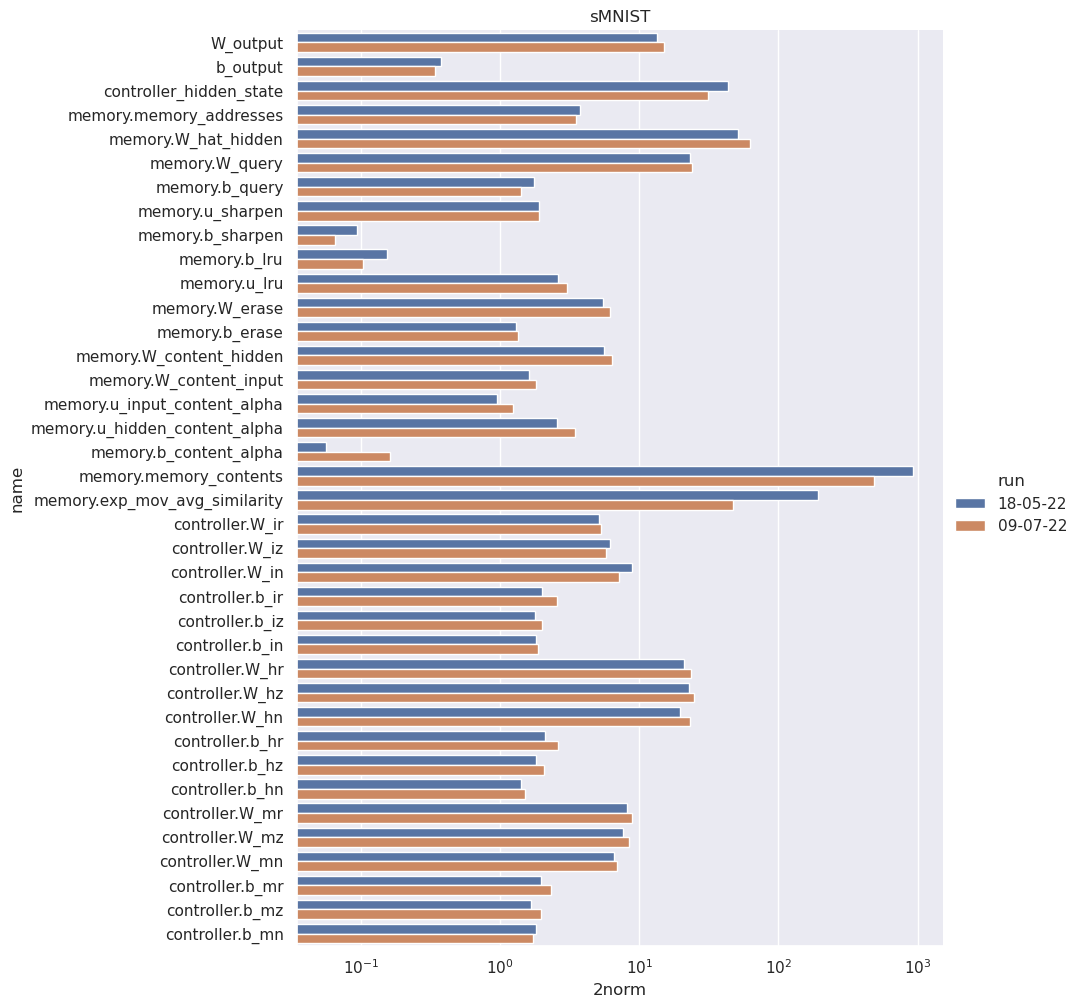

In [78]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST')

In [97]:
weights_df = pd.DataFrame()

for model, path in pmnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

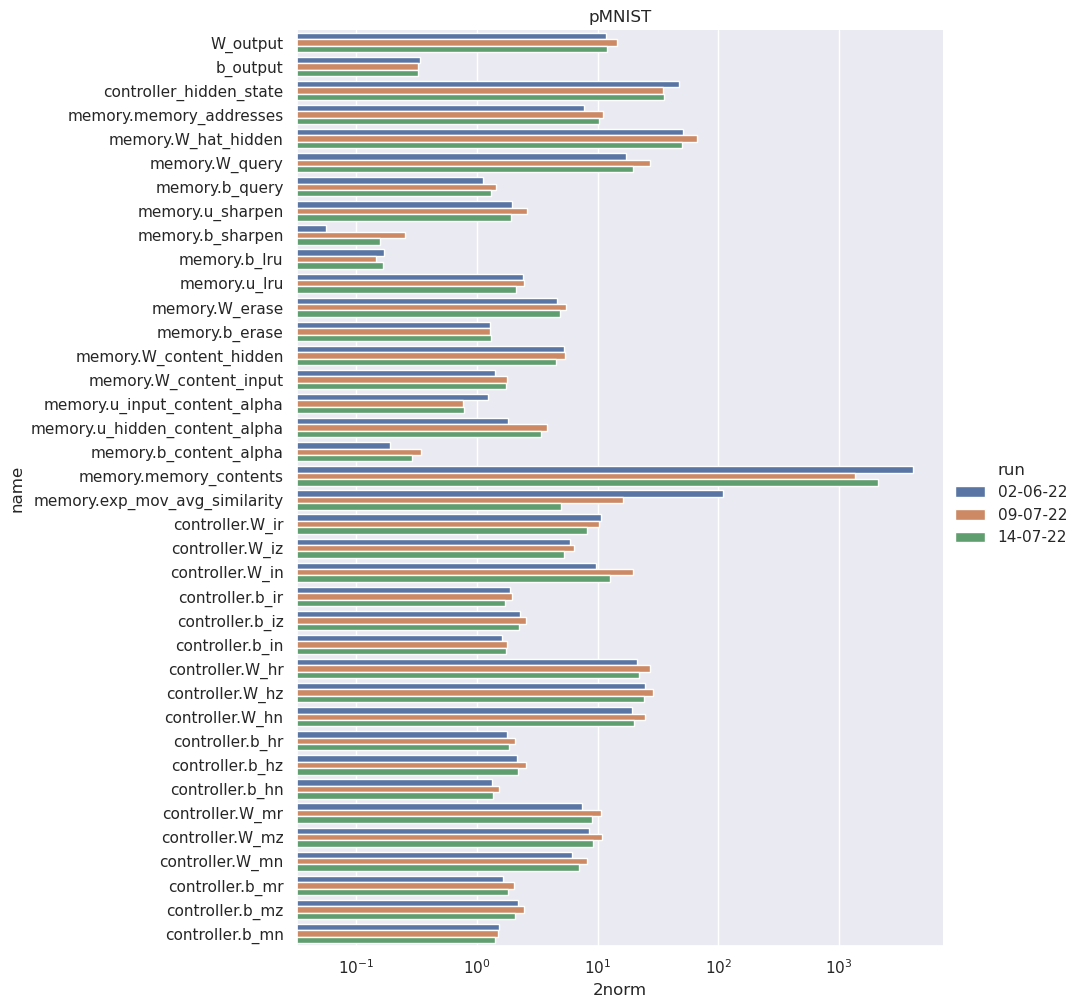

In [98]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='pMNIST')

In [103]:
weights_df = pd.DataFrame()

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights] 
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

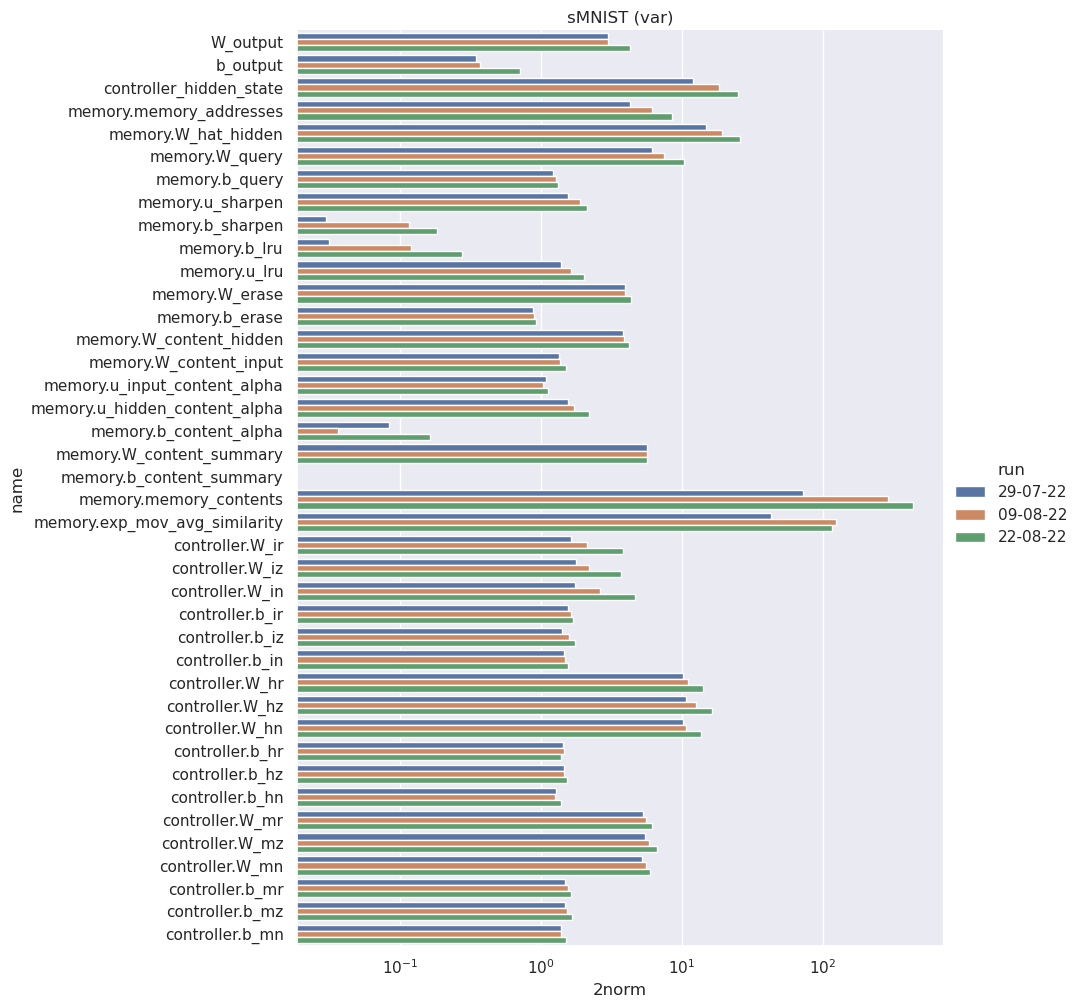

In [104]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST (var)')

In [105]:
weights_df = pd.DataFrame()

for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model + '(var)']*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

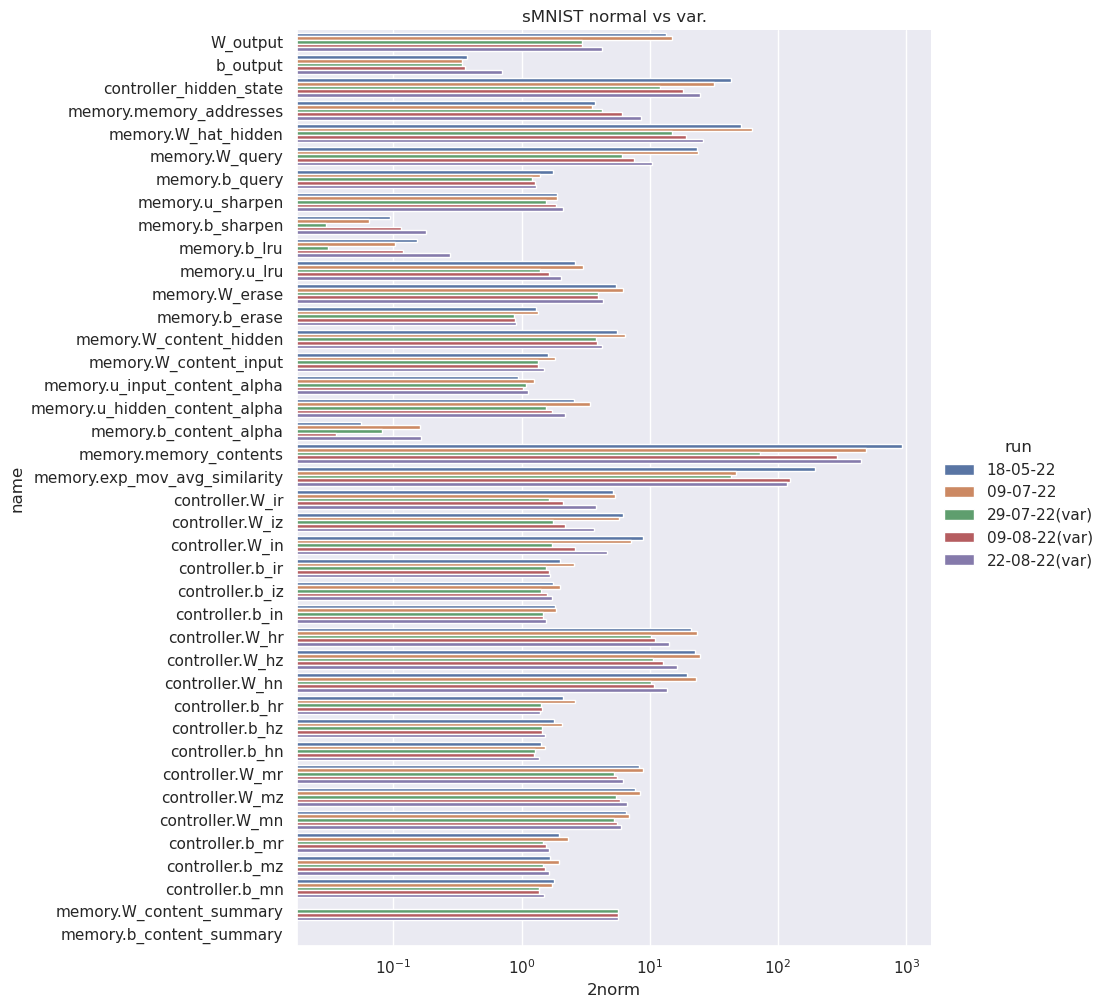

In [107]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST normal vs var.')

In [125]:
W_o_df = pd.DataFrame()
for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    W_o_flatten = model_weights["W_output"].cpu().flatten().numpy()
    tmp_df['$W_o$'] = W_o_flatten
    tmp_df['run'] = [model]*len(W_o_flatten)
    W_o_df = pd.concat((W_o_df, tmp_df))

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    W_o_flatten = model_weights["W_output"].cpu().flatten().numpy()
    tmp_df['$W_o$'] = W_o_flatten
    tmp_df['run'] = [model+"(var)"]*len(W_o_flatten)
    W_o_df = pd.concat((W_o_df, tmp_df))

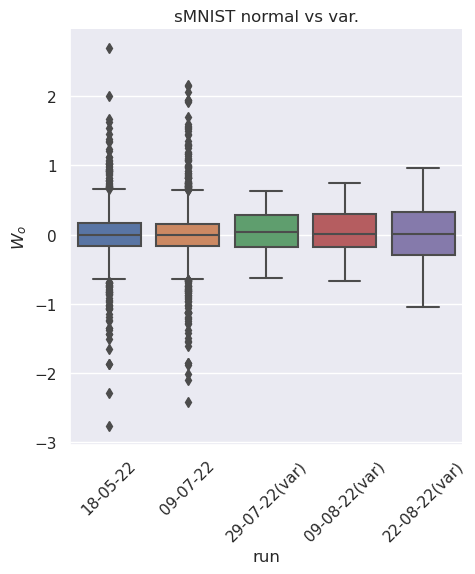

In [129]:
plot = sns.catplot(W_o_df, x='run', y='$W_o$', kind='box')
for ax in plot.axes.flat:
    ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plot = plot.set(title='sMNIST normal vs var.')